
### **Import libraries ⛳**




In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import plotly.express as ex

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### **Upload Data ⚓**

# **Showing data ⛈**


In [75]:
data=pd.read_csv("/content/loan_data_set.csv")

In [76]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [77]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [79]:
data.shape

(614, 13)

### **EDA: ☔**

In [80]:
data["Property_Area"].unique() 

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [81]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [82]:
data.drop(["Loan_ID"],axis=1,inplace=True)
data.drop(["Gender"],axis=1,inplace=True)

In [83]:

data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)

In [84]:
data.isnull().sum()

Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

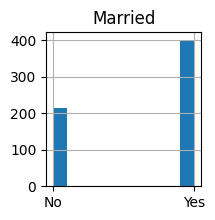

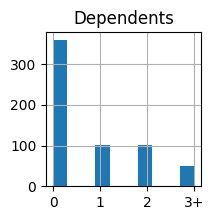

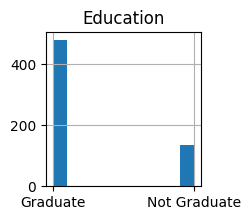

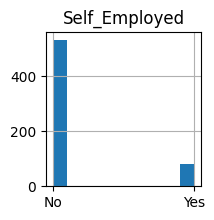

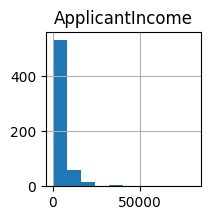

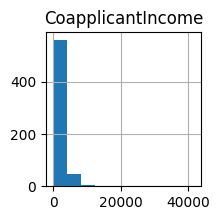

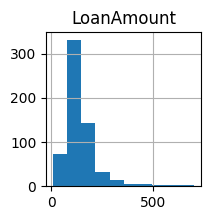

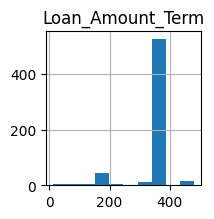

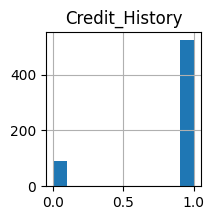

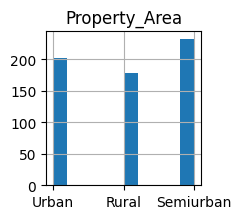

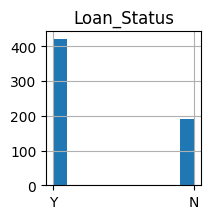

In [85]:
for col in data.columns:
    fig = plt.figure(figsize=(2,2))
    plt.title(f"{col}")
    data[col].hist()

<Axes: xlabel='LoanAmount', ylabel='Count'>

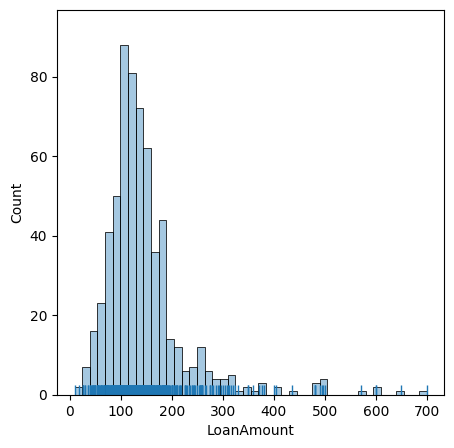

In [86]:
plt.figure(figsize=(5,5))
sns.histplot(data, x="LoanAmount", alpha=.4)
sns.rugplot(data, x="LoanAmount")

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

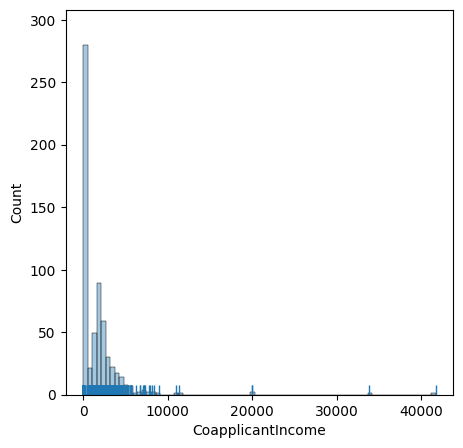

In [87]:
plt.figure(figsize=(5,5))
sns.histplot(data, x="CoapplicantIncome", alpha=.4)
sns.rugplot(data, x="CoapplicantIncome")

### **convert From Categorical to numerical data using (Label Encoding) ⚡**

In [88]:
fornum = preprocessing.LabelEncoder()

In [89]:
data['Married']= fornum.fit_transform(data['Married'])
data['Married'].unique()

array([0, 1])

In [90]:
data['Dependents']= fornum.fit_transform(data['Dependents'])
data['Dependents'].unique()

array([0, 1, 2, 3])

In [91]:
data['Education']= fornum.fit_transform(data['Education'])
data['Education'].unique()

array([0, 1])

In [92]:
data['Self_Employed']= fornum.fit_transform(data['Self_Employed'])
data['Self_Employed'].unique()

array([0, 1])

In [93]:
data['Property_Area']= fornum.fit_transform(data['Property_Area'])
data['Property_Area'].unique()

array([2, 0, 1])

In [94]:
data['Loan_Status']= fornum.fit_transform(data['Loan_Status'])
data['Loan_Status'].unique()

array([1, 0])

### **convert From Categorical to numerical data using (One Hot Encoding) ⚡**

In [95]:
#one_hot_encoded_data = pd.get_dummies(data, columns = ['Loan_Status', 'Property_Area','Self_Employed','Education','Dependents','Married'])
#print(one_hot_encoded_data)
enc = OneHotEncoder()
  
# Passing encoded columns
  
enc_data = pd.DataFrame(enc.fit_transform(
    data[['Loan_Status', 'Property_Area','Self_Employed','Education','Dependents','Married']]).toarray())
print(enc_data)

      0    1    2    3    4    5    6    7    8    9    10   11   12   13   14
0    0.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0
1    1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0
2    0.0  1.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0
3    0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0
4    0.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
609  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0
610  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0
611  0.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0
612  0.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0
613  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0

[614 rows x 15 columns]


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            614 non-null    int64  
 1   Dependents         614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 52.9 KB


### **distribution plot for every numeric feature by visualization 🧮**

In [97]:
!pip install klib
import klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: xlabel='Property_Area', ylabel='Density'>

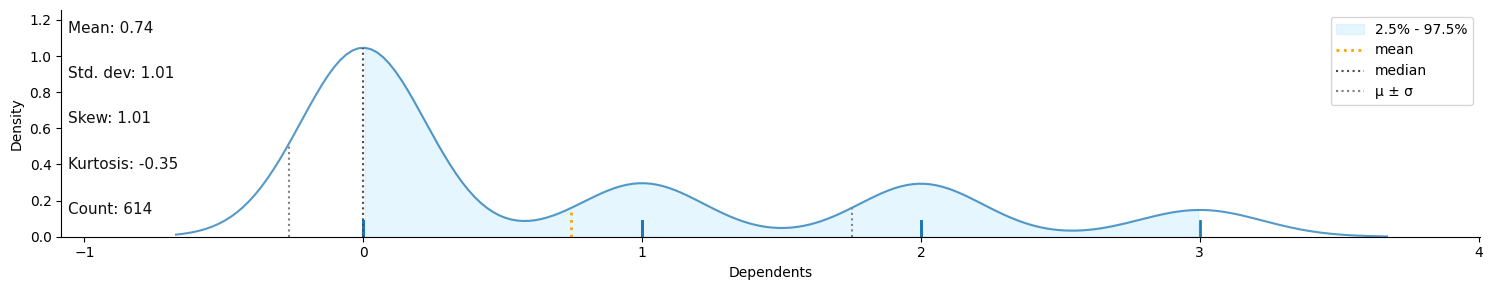

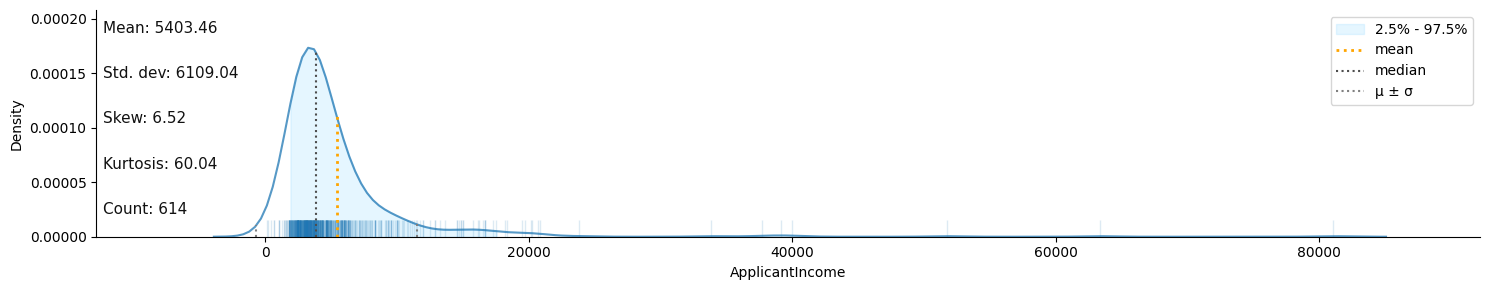

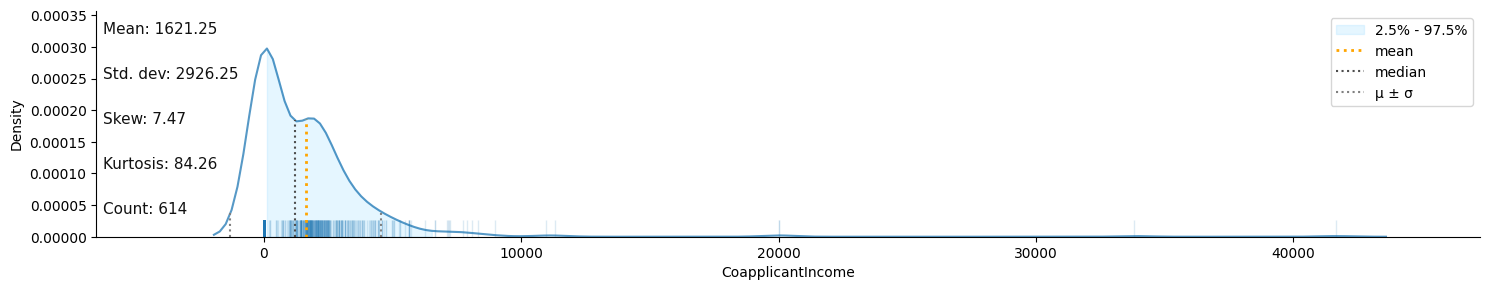

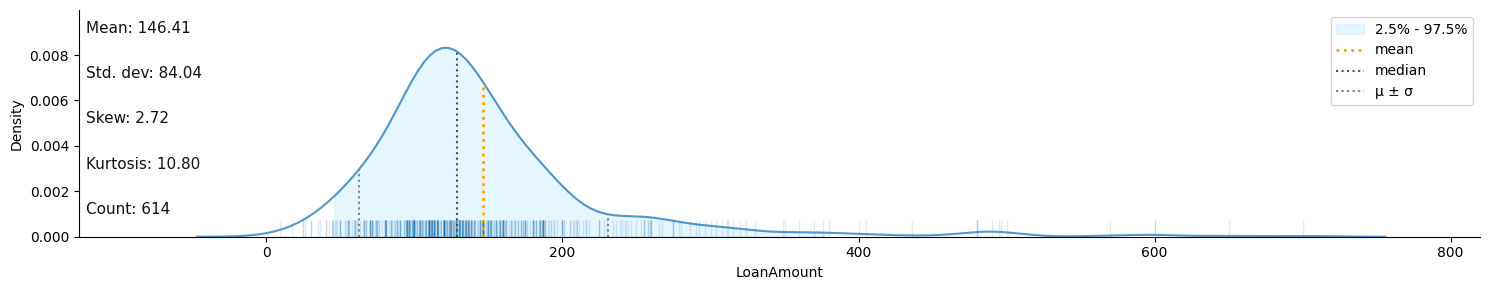

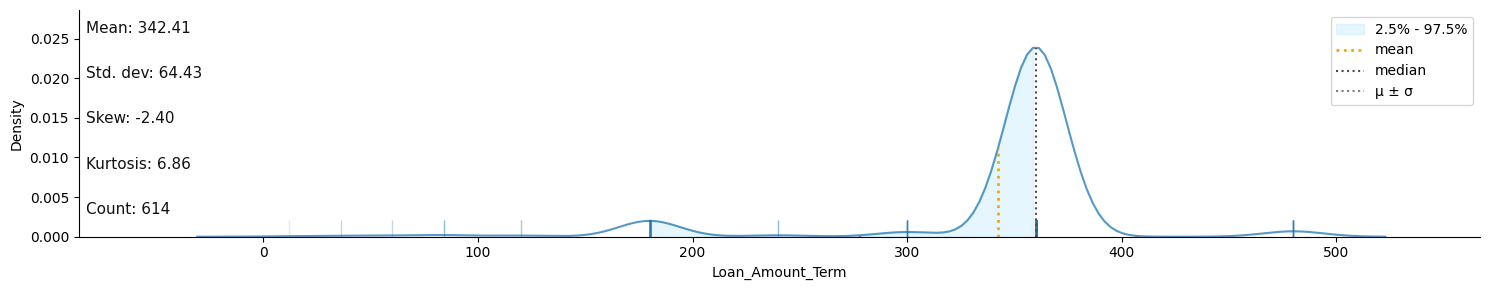

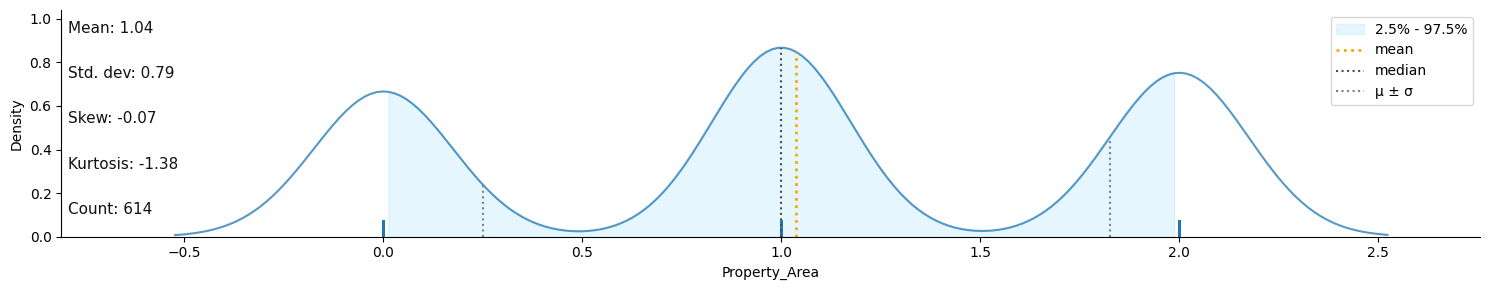

In [98]:
klib.dist_plot(data) # returns a distribution plot for every numeric feature

### **Feature selection using Correlation 💐**

<Axes: >

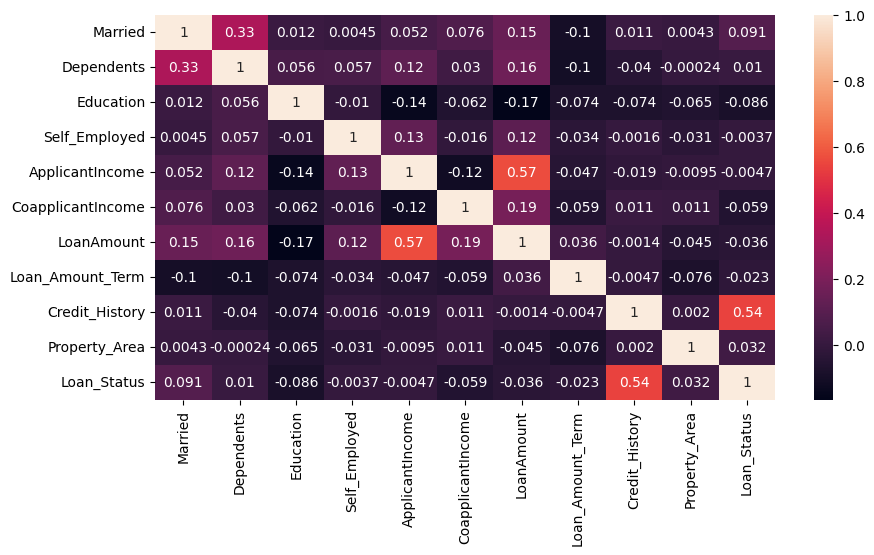

In [99]:
plt.subplots(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

## **Drop uncorrelated features ⏳**

In [100]:
data.drop(["Self_Employed"],axis=1,inplace=True)
data.drop(["ApplicantIncome"],axis=1,inplace=True)
data.drop(["Dependents"],axis=1,inplace=True)

## **Handling Outliers ✌ and feature selection**

In [101]:
#Showing the uncorrelated features 
def correlation(data,threshold):
  col_corr=set()
  corr_matrix=data.corr()
  for i in range(len(corr_matrix.columns)):
   for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
       colname=corr_matrix.columns[i]
       col_corr.add(colname)
  return col_corr

In [102]:
costing_features =correlation(data,0.02)
costing_features 

{'CoapplicantIncome',
 'Credit_History',
 'LoanAmount',
 'Loan_Amount_Term',
 'Loan_Status',
 'Property_Area'}

In [103]:
from sklearn.feature_selection import chi2,SelectKBest
#define feature selection
fs = SelectKBest(score_func=chi2, k=6)
# apply feature selection
X= fs.fit_transform( data.drop(["Loan_Status"],axis=1), data['Loan_Status'])

fs.get_support(indices=True)

array([0, 1, 2, 3, 4, 5])

<ipython-input-104-9e0c50b09345>:20: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



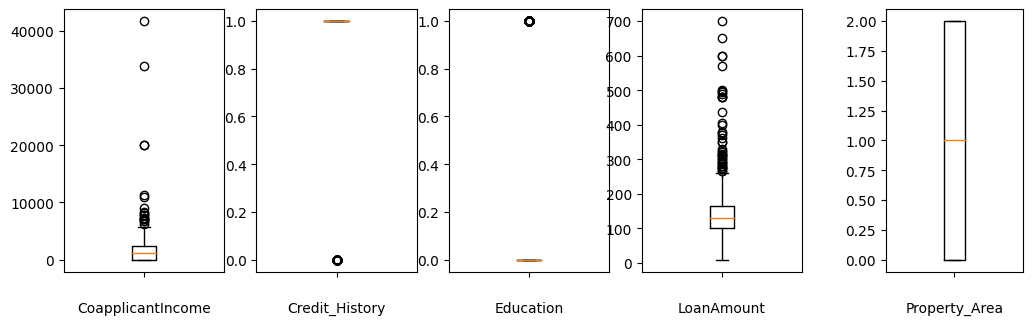

In [104]:
plt.rcParams["figure.figsize"] = [14.50, 7.50]
plt.subplot(261)
plt.boxplot(data['CoapplicantIncome'],labels=' ');
plt.xlabel('CoapplicantIncome')
plt.subplot(262)
plt.boxplot(data['Credit_History'],labels=' ');
plt.xlabel('Credit_History')
# plt.subplot(273)
# plt.boxplot(data['Dependents'],labels=' ');
# plt.xlabel('Dependents')
plt.subplot(263)
plt.boxplot(data['Education'],labels=' ');
plt.xlabel('Education');
plt.subplot(264)
plt.boxplot(data['LoanAmount'],labels=' ');
plt.xlabel('LoanAmount');
plt.subplot(265)
plt.boxplot(data['Loan_Amount_Term'],labels=' ');
plt.xlabel('Loan_Amount_Term');
plt.subplot(276)
plt.boxplot(data['Property_Area'],labels=' ');
plt.xlabel('Property_Area');



## **Handling outliers by Z_score 📊**

In [105]:
#Checking Outliers 
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

## **Handling outliers by IQR 📊**

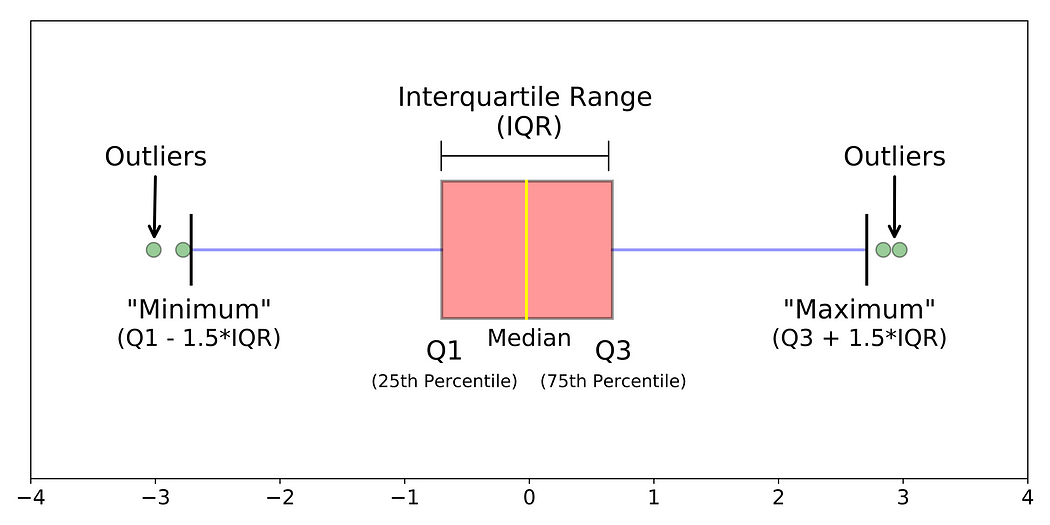

In [106]:
#Let's try get ride of outliers!
for x in ['CoapplicantIncome',
 'LoanAmount','Loan_Amount_Term']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
  
    data.loc[data[x] > max,x] = max


<ipython-input-107-9e0c50b09345>:20: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



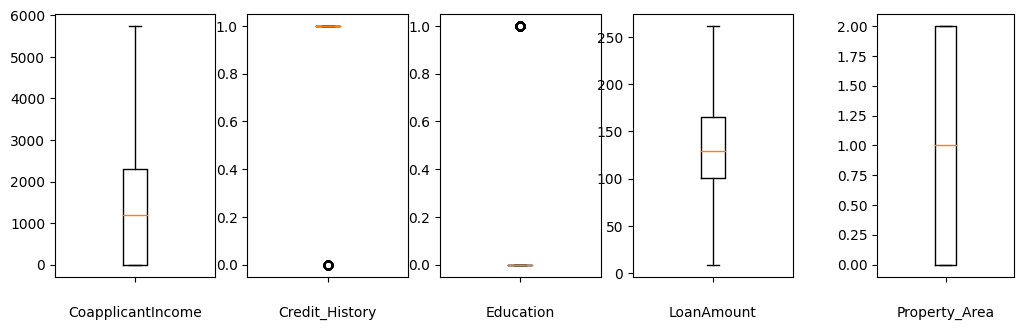

In [107]:
plt.rcParams["figure.figsize"] = [14.50, 7.50]
plt.subplot(261)
plt.boxplot(data['CoapplicantIncome'],labels=' ');
plt.xlabel('CoapplicantIncome')
plt.subplot(262)
plt.boxplot(data['Credit_History'],labels=' ');
plt.xlabel('Credit_History')
# plt.subplot(273)
# plt.boxplot(data['Dependents'],labels=' ');
# plt.xlabel('Dependents')
plt.subplot(263)
plt.boxplot(data['Education'],labels=' ');
plt.xlabel('Education');
plt.subplot(264)
plt.boxplot(data['LoanAmount'],labels=' ');
plt.xlabel('LoanAmount');
plt.subplot(265)
plt.boxplot(data['Loan_Amount_Term'],labels=' ');
plt.xlabel('Loan_Amount_Term');
plt.subplot(276)
plt.boxplot(data['Property_Area'],labels=' ');
plt.xlabel('Property_Area');



## **Showing Duplicates and dropping it ✍**

In [108]:
data.duplicated().sum()

23

In [109]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

## **Visualizations  🧮 📊**

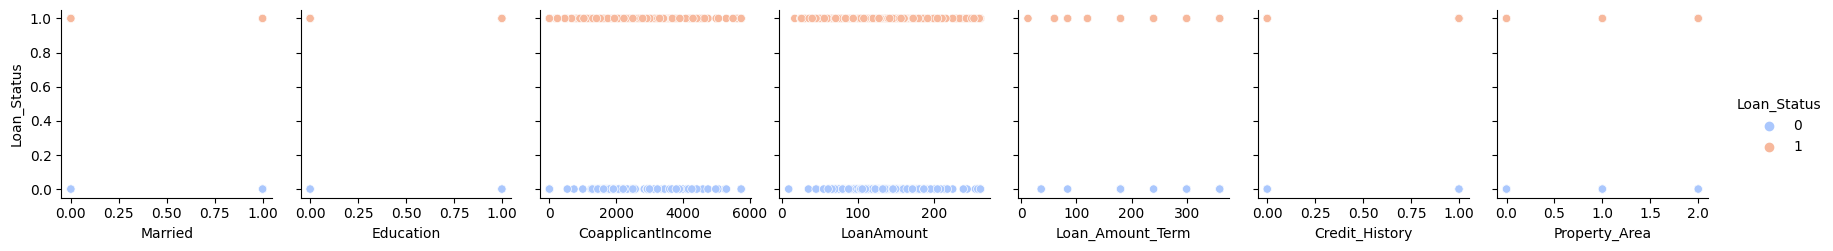

In [110]:
sns.pairplot(
    data,
    x_vars=["Married",  "Education","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area"],
    y_vars=["Loan_Status"],hue='Loan_Status',
    palette='coolwarm'
)

In [111]:
ex.pie(data,names='Married',width=500,height=500)

In [112]:
ex.pie(data,names='Loan_Amount_Term',width=500,height=500)

In [113]:
ex.pie(data,names='Property_Area',width=500,height=500)

In [114]:
!pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [115]:
!pip install pandas_profiling --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### **Splitting Data ⛈**

In [117]:
X=data.drop(['Loan_Status'],axis=1)
Y=data['Loan_Status']

In [118]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.12,random_state=45)
X_train

,Married,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
134,0,0,0.0,102.0,360.0,1.0,1
476,1,0,1750.0,230.0,300.0,1.0,1
30,1,0,3369.0,201.0,360.0,1.0,2
14,1,0,1086.0,17.0,120.0,1.0,2
568,0,0,0.0,9.0,360.0,1.0,2
...,...,...,...,...,...,...,...
381,0,0,4232.0,261.5,360.0,1.0,1
601,1,1,2792.0,155.0,360.0,1.0,0
164,1,0,0.0,75.0,180.0,1.0,2
560,1,1,242.0,108.0,360.0,1.0,1


### **Logistic Regression  👀**

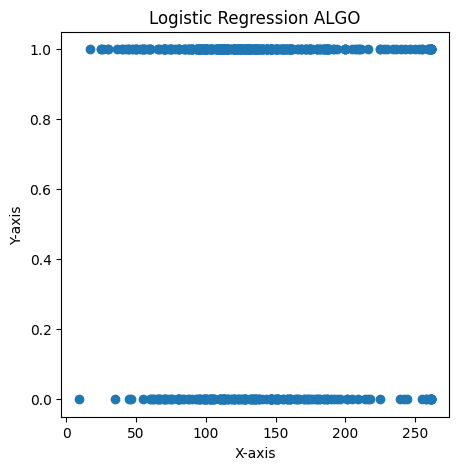

In [119]:
plt.figure(figsize=(5,5))
plt.scatter(data["LoanAmount"], Y )
plt.title('Logistic Regression ALGO') # Title of the plot
plt.xlabel('X-axis') # X-Label
plt.ylabel('Y-axis') # Y-Label
plt.show()

In [120]:
model1=LogisticRegression(max_iter=50000)
model1.fit(X_train,y_train)

LogisticRegression(max_iter=50000)

In [121]:
predictions = model1.predict(X_test)

In [122]:
accuracy_score(y_test,predictions)*100

92.95774647887323

In [123]:
report = classification_report (y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        18
           1       0.91      1.00      0.95        53

    accuracy                           0.93        71
   macro avg       0.96      0.86      0.90        71
weighted avg       0.94      0.93      0.93        71



In [124]:
cf_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix(y_test, predictions))


[[13  5]
 [ 0 53]]


<Axes: >

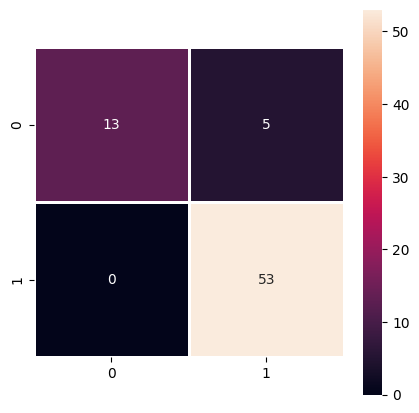

In [125]:
plt.figure(figsize=(5,5))
sns.heatmap(cf_matrix, annot=True ,square=8,linewidths=2)


### **SVC Algorithm  ⛹**


In [126]:
model_SVM=LinearSVC(max_iter=10000,random_state=35)
model_SVM.fit(X_train,y_train)
y_prediction=model_SVM.predict(X_test)
accuracy=accuracy_score(y_test,y_prediction)*100
accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



85.91549295774648

In [127]:
report = classification_report (y_test, y_prediction)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.44      0.62        18
           1       0.84      1.00      0.91        53

    accuracy                           0.86        71
   macro avg       0.92      0.72      0.76        71
weighted avg       0.88      0.86      0.84        71



In [128]:
cf_matrix_SVC = confusion_matrix(y_test, y_prediction)
print(confusion_matrix(y_test, y_prediction))

[[ 8 10]
 [ 0 53]]


<Axes: >

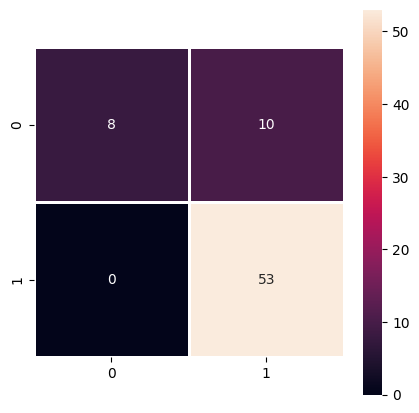

In [129]:
plt.figure(figsize=(5,5))
sns.heatmap(cf_matrix_SVC, annot=True ,square=8,linewidths=2)


### **decision tree 🌴🎄 model**


In [130]:
#decision tree
model_tree=tree.DecisionTreeClassifier(random_state=2,max_depth=4)
model_tree.fit(X_train,y_train)
prediction_decision_tree=model_tree.predict(X_test)
accuracy_tree=accuracy_score(y_test,prediction_decision_tree)*100

accuracy_tree

92.95774647887323

In [131]:
report = classification_report (y_test, prediction_decision_tree)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        18
           1       0.91      1.00      0.95        53

    accuracy                           0.93        71
   macro avg       0.96      0.86      0.90        71
weighted avg       0.94      0.93      0.93        71



In [132]:
cf_matrix_Tree = confusion_matrix(y_test, prediction_decision_tree)
print(confusion_matrix(y_test, prediction_decision_tree))

[[13  5]
 [ 0 53]]


<Axes: >

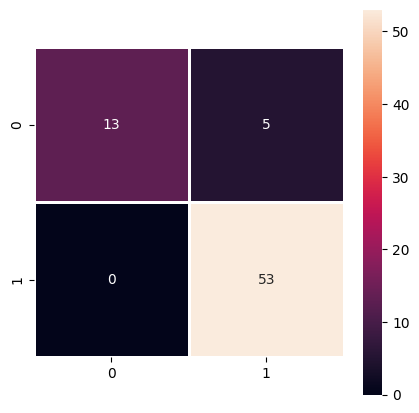

In [133]:
plt.figure(figsize=(5,5))
sns.heatmap(cf_matrix_Tree , annot=True ,square=8,linewidths=2)

### **decision tree 🌴🎄 Visualization 🏕**

In [134]:
!pip install pydotplus
!apt-get install graphviz -y
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
E: Package 'libfluidsynth1' has no installation candidate
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


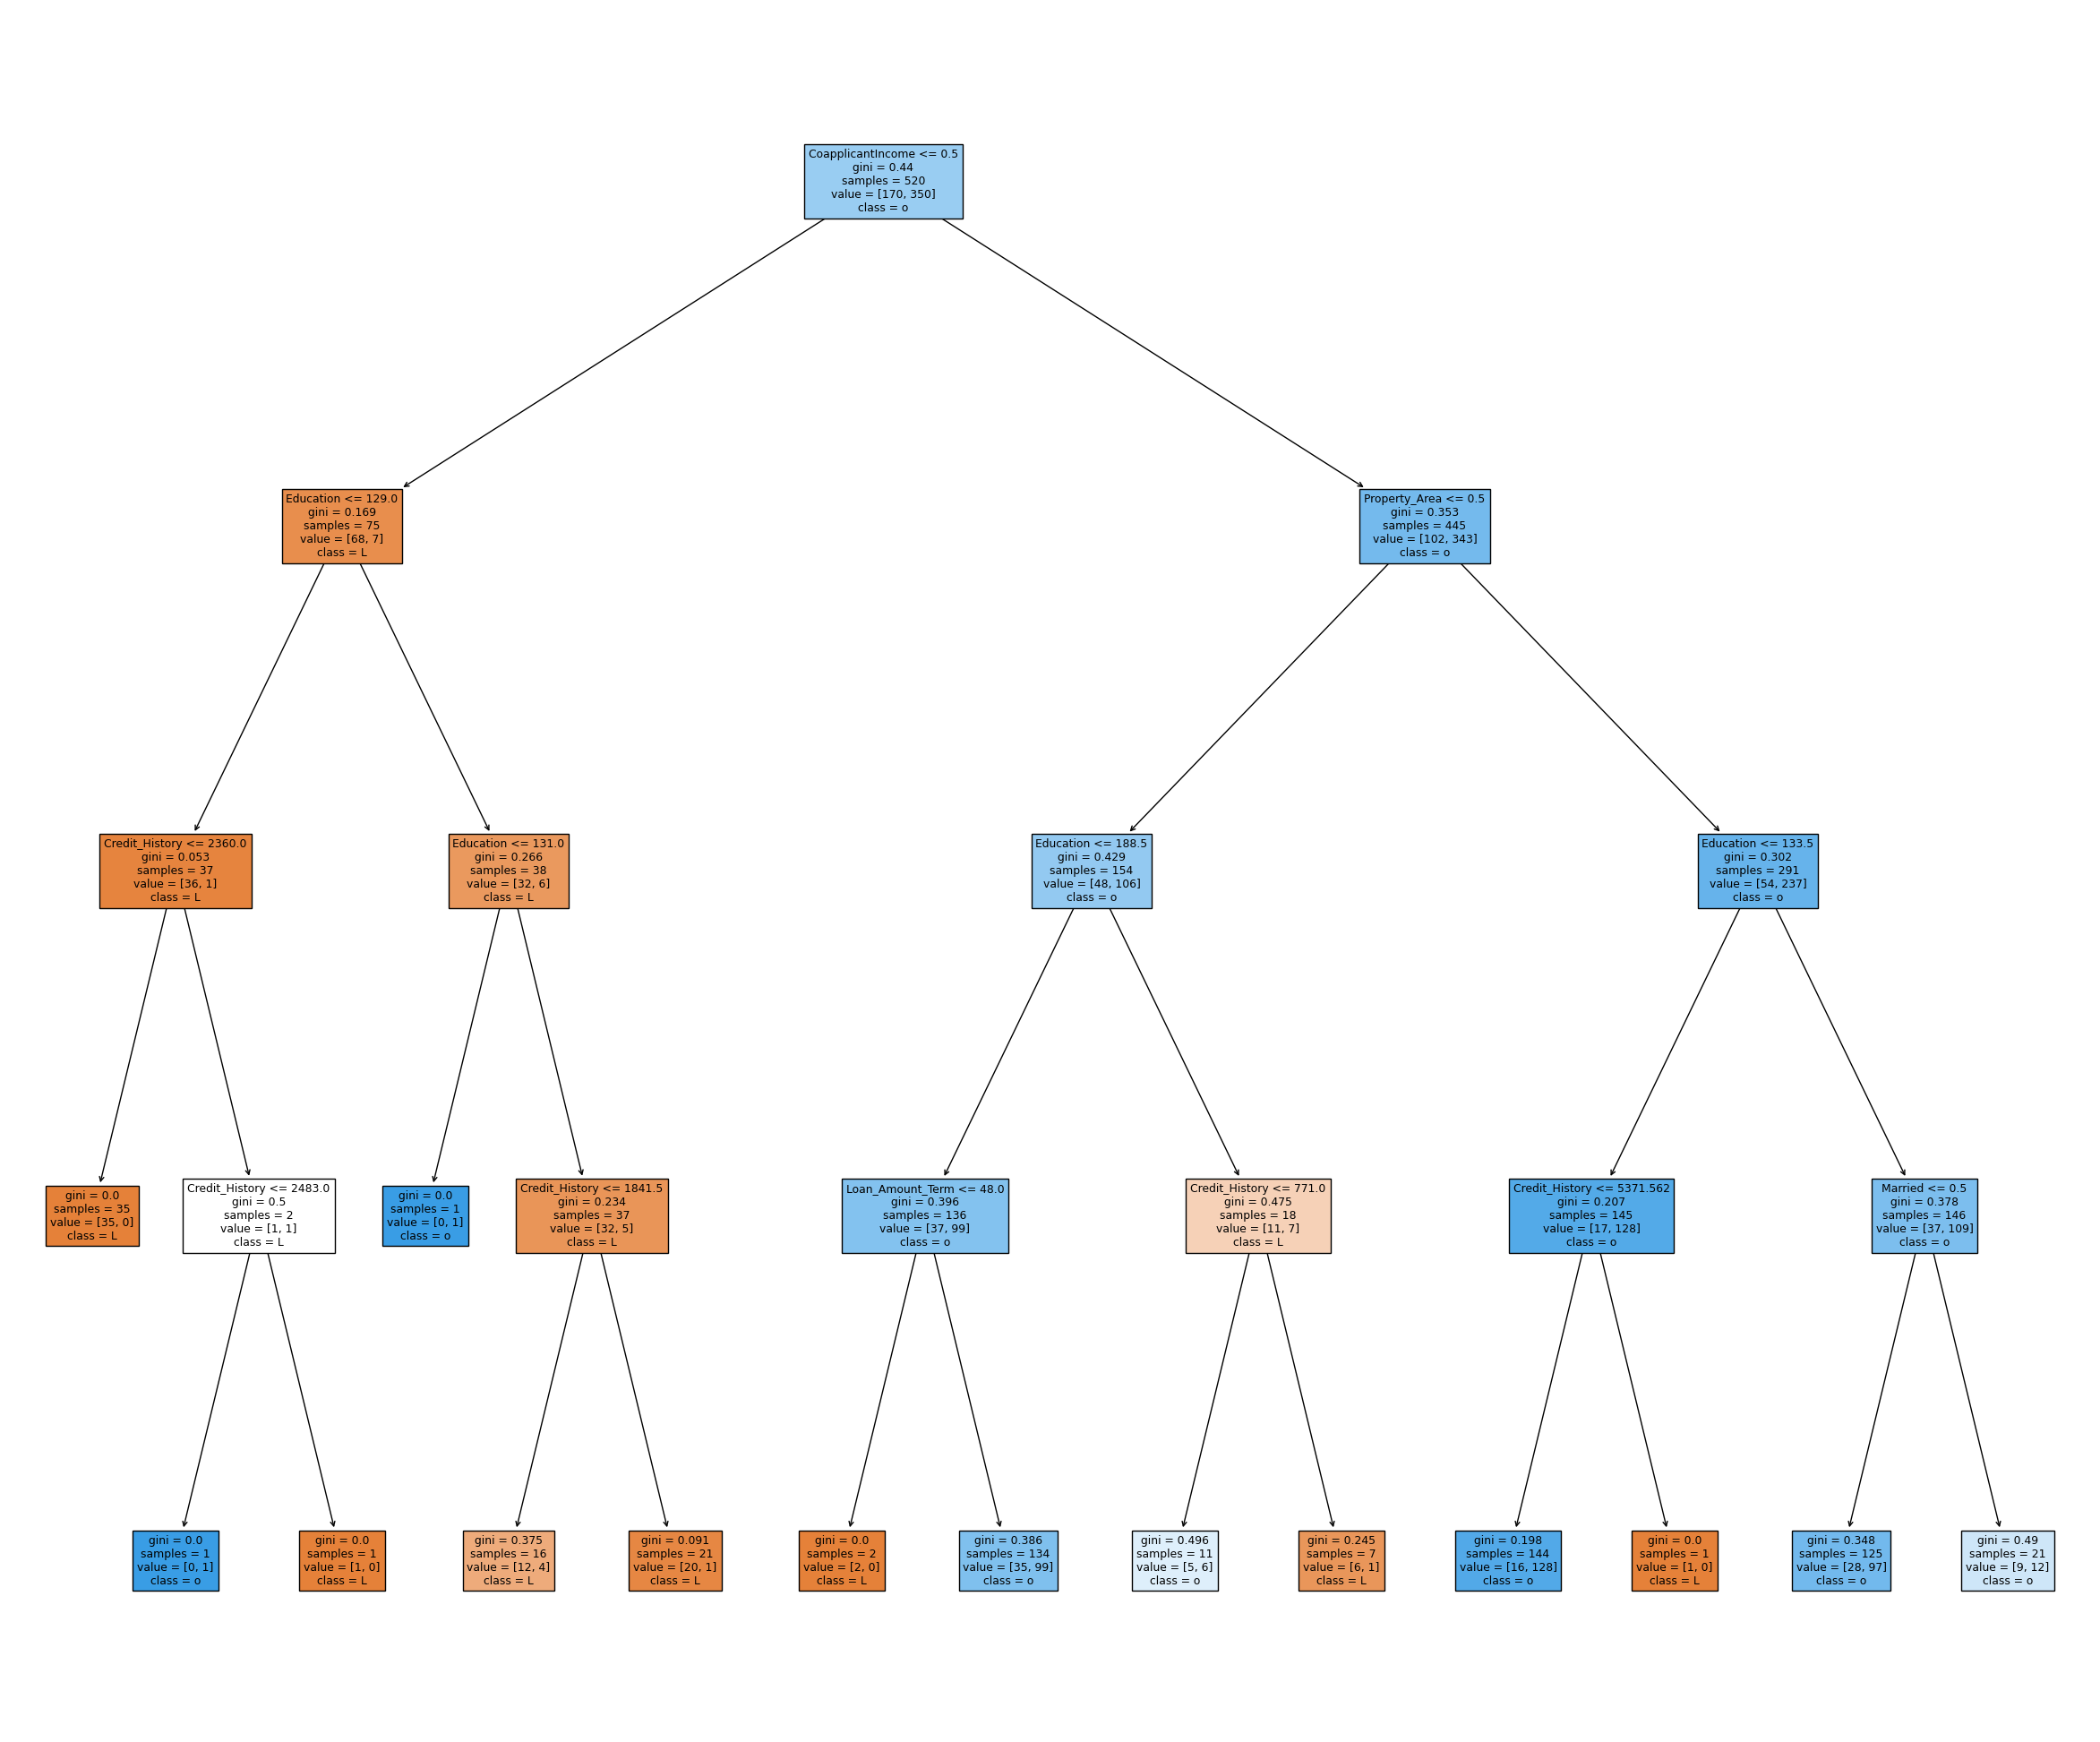

In [135]:
fig = plt.figure(figsize=(30,25))
_ = tree.plot_tree(model_tree,
                   feature_names = ["Property_Area", "Married", "Credit_History","Education","Loan_Amount_Term","CoapplicantIncome"],
                   class_names = "Loan_Status",
                   filled=True)